Looking at the Dataset for examining 

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chi2



In [4]:
# Load each dataset
courses_df = pd.read_csv("data/courses.csv")
assessments_df = pd.read_csv("data/assessments.csv")
vle_df = pd.read_csv("data/vle.csv")
student_info_df = pd.read_csv("data/studentInfo.csv")
student_registration_df = pd.read_csv("data/studentRegistration.csv")
student_assessment_df = pd.read_csv("data/studentAssessment.csv")
student_vle_df = pd.read_csv("data/studentVle.csv")

COURSES

In [14]:
# Split code_presentation into start_year and start_month
courses_df['start_year'] = courses_df['code_presentation'].str[:4]
courses_df['start_month'] = courses_df['code_presentation'].str[4:].map({'J': 'Feb', 'B': 'Oct'})

# Drop the original code_presentation column
courses_df.drop(columns=['code_presentation'], inplace=True)

# Check for missing values
missing_values = courses_df.isnull().sum()
print("Missing values:\n", missing_values)

# Display the updated dataframe
print("Updated DataFrame:")
print(courses_df.head())

# Analysing the distribution of module_presentation_length
print("Module Presentation Length Statistics:")
print(courses_df['module_presentation_length'].describe())

# IF ERROR OCCURS, RE-RUN THE IMPORT SCRIPT #

KeyError: 'code_presentation'

ASSESSMENTS

In [15]:
# Split code_presentation into start_year and start_month
assessments_df['start_year'] = assessments_df['code_presentation'].str[:4]
assessments_df['start_month'] = assessments_df['code_presentation'].str[4:].map({'J': 'Feb', 'B': 'Oct'})

# Drop the original code_presentation column
assessments_df.drop(columns=['code_presentation'], inplace=True)

# Step 2: Check for missing values and handle them if necessary
print("Missing values:")
print(assessments_df.isnull().sum())

# Imputing missing values in the 'date' column with the maximum date as they were due at the end of the presentation (context in on open uni data summary)
max_date = assessments_df['date'].max()
assessments_df['date'].fillna(max_date, inplace=True)

# Analysing the distribution of assessment_type
assessment_type_distribution = assessments_df['assessment_type'].value_counts()
print("Distribution of assessment_type:")
print(assessment_type_distribution)

# Display the updated dataframe or perform further analysis
print("Updated DataFrame:")
print(assessments_df.head())

Missing values:
code_module         0
id_assessment       0
assessment_type     0
date               11
weight              0
start_year          0
start_month         0
dtype: int64
Distribution of assessment_type:
assessment_type
TMA     106
CMA      76
Exam     24
Name: count, dtype: int64
Updated DataFrame:
  code_module  id_assessment assessment_type   date  weight start_year  \
0         AAA           1752             TMA   19.0    10.0       2013   
1         AAA           1753             TMA   54.0    20.0       2013   
2         AAA           1754             TMA  117.0    20.0       2013   
3         AAA           1755             TMA  166.0    20.0       2013   
4         AAA           1756             TMA  215.0    30.0       2013   

  start_month  
0         Feb  
1         Feb  
2         Feb  
3         Feb  
4         Feb  


/var/folders/90/z83cxjcn6h3c4q15nk2qr1_00000gn/T/ipykernel_29971/1757167583.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  assessments_df['date'].fillna(max_date, inplace=True)


VLE

In [16]:
# Split code_presentation into start_year and start_month
vle_df['start_year'] = vle_df['code_presentation'].str[:4]
vle_df['start_month'] = vle_df['code_presentation'].str[4:].map({'J': 'Feb', 'B': 'Oct'})

# Drop the original code_presentation column
vle_df.drop(columns=['code_presentation'], inplace=True)

# Check for missing values and handle them if necessary
print("Missing values:\n", vle_df.isnull().sum())

# Drop columns week_from and week_to
vle_df.drop(['week_from', 'week_to'], axis=1, inplace=True)

# Analyze the distribution of activity_type
activity_type_distribution = vle_df['activity_type'].value_counts()
print("Activity Type Distribution:\n", activity_type_distribution)

# Display the updated columns
print(vle_df.columns)


Missing values:
 id_site             0
code_module         0
activity_type       0
week_from        5243
week_to          5243
start_year          0
start_month         0
dtype: int64
Activity Type Distribution:
 activity_type
resource          2660
subpage           1055
oucontent          996
url                886
forumng            194
quiz               127
page               102
oucollaborate       82
questionnaire       61
ouwiki              49
dataplus            28
externalquiz        26
homepage            22
ouelluminate        21
glossary            21
dualpane            20
repeatactivity       5
htmlactivity         4
sharedsubpage        3
folder               2
Name: count, dtype: int64
Index(['id_site', 'code_module', 'activity_type', 'start_year', 'start_month'], dtype='object')


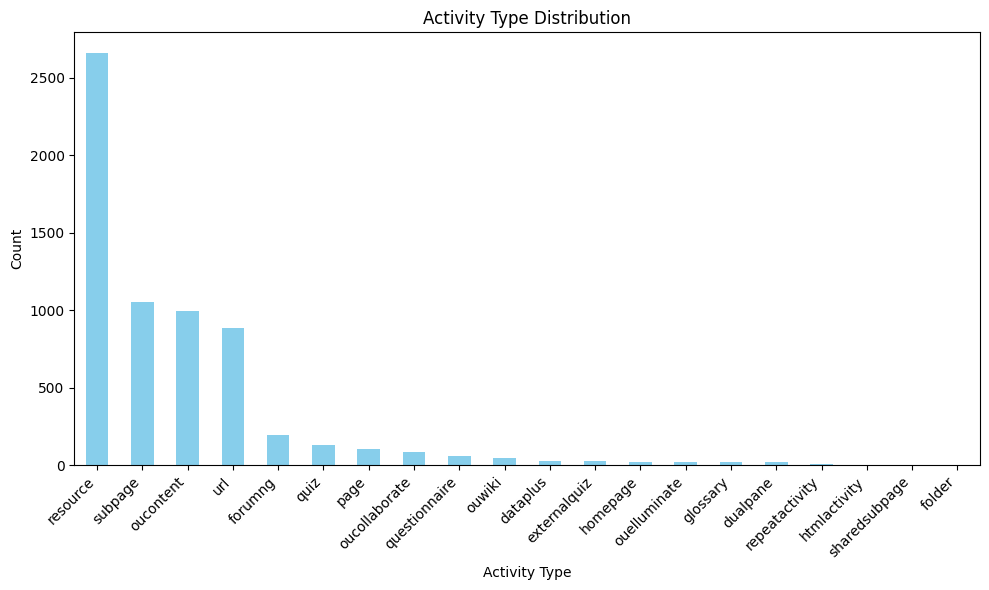

In [17]:
# Calculate the distribution of activity types
activity_type_distribution = vle_df['activity_type'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
activity_type_distribution.plot(kind='bar', color='skyblue')
plt.title('Activity Type Distribution')
plt.xlabel('Activity Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

STUDENT INFO

Missing values:
 code_module                0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
start_year                 0
start_month                0
dtype: int64
No duplicate rows found.
Studied Credits Distribution:
 studied_credits
60     16751
120     6328
30      3749
90      3144
180      830
       ...  
480        1
655        1
390        1
235        1
430        1
Name: count, Length: 61, dtype: int64
Number of Previous Attempts Distribution:
 num_of_prev_attempts
0    28421
1     3299
2      675
3      142
4       39
5       13
6        4
Name: count, dtype: int64
Gender distribution:
 gender
M    17875
F    14718
Name: count, dtype: int64
  code_module  id_student gender                region      highest_education  \
0         AAA  

/Users/milton/anaconda3/envs/Statistics/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/milton/anaconda3/envs/Statistics/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/milton/anaconda3/envs/Statistics/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/milton/anaconda3/envs/Statistics/lib/python3.12/site-packag

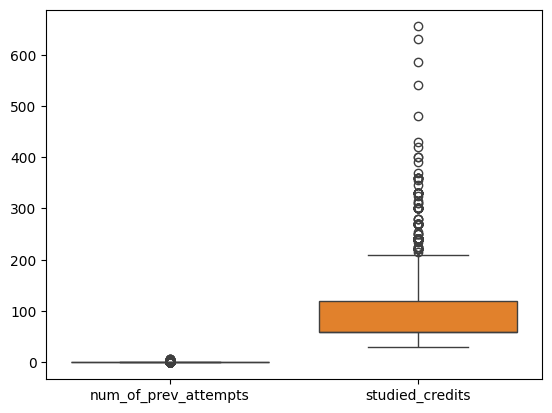

In [18]:
# Split code_presentation into start_year and start_month
student_info_df['start_year'] = student_info_df['code_presentation'].str[:4]
student_info_df['start_month'] = student_info_df['code_presentation'].str[4:].map({'J': 'Feb', 'B': 'Oct'})

# Drop the original code_presentation column
student_info_df.drop(columns=['code_presentation'], inplace=True)

# Check for missing values
missing_values = student_info_df.isnull().sum()
print("Missing values:\n", missing_values)


# Check for duplicates and remove them if necessary
duplicate_rows = student_info_df.duplicated().sum()
if duplicate_rows > 0:
    student_info_df = student_info_df.drop_duplicates()
    print("Removed {} duplicate rows.".format(duplicate_rows))
else:
    print("No duplicate rows found.")

# Check for outliers
# Visualize the distribution of num_of_prev_attempts and studied_credits
sns.boxplot(data=student_info_df[['num_of_prev_attempts', 'studied_credits']])

# analysis of the distribution of num_of_prev_attempts and studied_credits
studied_credits_distribution = student_info_df['studied_credits'].value_counts()
print("Studied Credits Distribution:\n", studied_credits_distribution)
num_of_prev_attempts_distribution = student_info_df['num_of_prev_attempts'].value_counts()
print("Number of Previous Attempts Distribution:\n", num_of_prev_attempts_distribution)

# analyze the distribution of categorical variables
# Analyze the distribution of gender
gender_distribution = student_info_df['gender'].value_counts()
print("Gender distribution:\n", gender_distribution)

# Display the modified DataFrame
print(student_info_df.head())


In [19]:
imd_band_by_region = student_info_df.groupby('region')['imd_band'].size()
print("imd_band by region:\n", imd_band_by_region)

print(" ")

missing_imd_band = student_info_df[student_info_df['imd_band'].isnull()].groupby('region').size()
print("Missing imd_band by region:\n", missing_imd_band)

imd_band by region:
 region
East Anglian Region     3340
East Midlands Region    2365
Ireland                 1184
London Region           3216
North Region            1823
North Western Region    2906
Scotland                3446
South East Region       2111
South Region            3092
South West Region       2436
Wales                   2086
West Midlands Region    2582
Yorkshire Region        2006
Name: imd_band, dtype: int64
 
Missing imd_band by region:
 region
Ireland                 266
North Region            731
North Western Region      5
Scotland                 12
South Region             48
South West Region         5
West Midlands Region     39
Yorkshire Region          5
dtype: int64


In [20]:
# Filling the missing values in 'imd_band' with the mode of 'imd_band' for each region
# Iterate over each region
for region in student_info_df['region'].unique():
    # Calculate the mode of 'imd_band' for the current region
    mode_imd = student_info_df[student_info_df['region'] == region]['imd_band'].mode().iloc[0]
    # Fill missing values in 'imd_band' for the current region with its mode
    student_info_df.loc[student_info_df['region'] == region, 'imd_band'] = student_info_df.loc[student_info_df['region'] == region, 'imd_band'].fillna(mode_imd)

print("Missing values after imputation:\n", student_info_df.isnull().sum())

Missing values after imputation:
 code_module             0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
start_year              0
start_month             0
dtype: int64


STUDENT REGISTRATION

In [21]:
# Split code_presentation into start_year and start_month
student_registration_df['start_year'] = student_registration_df['code_presentation'].str[:4]
student_registration_df['start_month'] = student_registration_df['code_presentation'].str[4:].map({'J': 'Feb', 'B': 'Oct'})

# Drop the original code_presentation column
student_registration_df.drop(columns=['code_presentation'], inplace=True)

# Check for missing values
missing_values = student_registration_df.isnull().sum()
print("Missing values:\n", missing_values)

# Check for duplicates and remove them if necessary
duplicate_rows = student_registration_df.duplicated().sum()
if duplicate_rows > 0:
    student_registration_df = student_registration_df.drop_duplicates()
    print("Removed {} duplicate rows.".format(duplicate_rows))
else:
    print("No duplicate rows found.")

# Drop rows with missing values in the date_registration column as this indicates the student has not enrolled and is not apart of my model
student_registration_df.dropna(subset=['date_registration'], inplace=True)

# Now the DataFrame df contains only rows where date_registration is not missing
print("Missing values after imputation:\n", student_registration_df.isnull().sum())


Missing values:
 code_module                0
id_student                 0
date_registration         45
date_unregistration    22521
start_year                 0
start_month                0
dtype: int64
No duplicate rows found.
Missing values after imputation:
 code_module                0
id_student                 0
date_registration          0
date_unregistration    22515
start_year                 0
start_month                0
dtype: int64


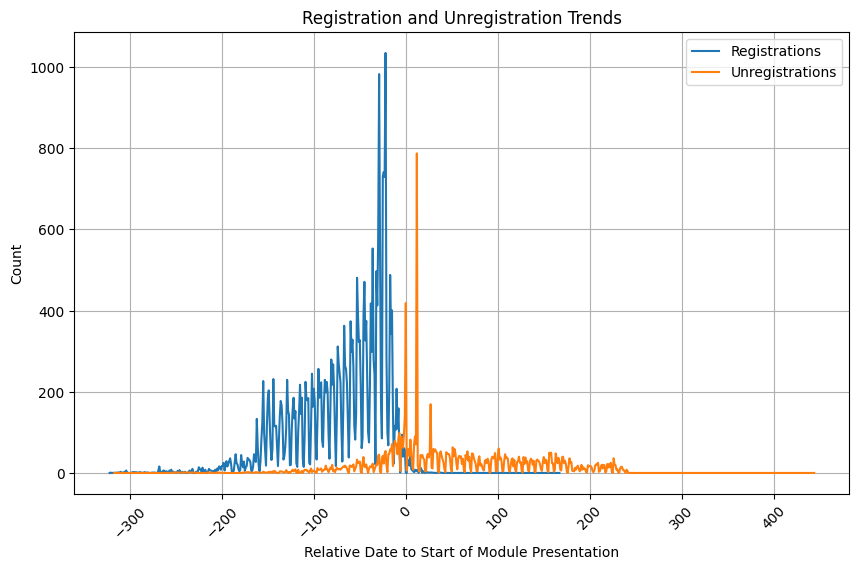

In [22]:
# Count the number of registrations and unregistrations per month
registration_counts = student_registration_df['date_registration'].value_counts().sort_index()
unregistration_counts = student_registration_df['date_unregistration'].value_counts().sort_index()

# Plot the trends
plt.figure(figsize=(10, 6))
registration_counts.plot(label='Registrations')
unregistration_counts.plot(label='Unregistrations')
plt.title('Registration and Unregistration Trends')
plt.xlabel('Relative Date to Start of Module Presentation')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show() # data shows that there is a spike of unregistrations at the start of the module presentation

STUDENT VLE

In [23]:
# Split code_presentation into start_year and start_month
student_vle_df['start_year'] = student_vle_df['code_presentation'].str[:4]
student_vle_df['start_month'] = student_vle_df['code_presentation'].str[4:].map({'J': 'Feb', 'B': 'Oct'})

# Drop the original code_presentation column
student_vle_df.drop(columns=['code_presentation'], inplace=True)

# Check for missing values and handle them if necessary
missing_values = student_vle_df.isnull().sum()
print("Missing values:")
print(missing_values)

# Check for duplicates and remove them if necessary
duplicate_rows = student_vle_df.duplicated().sum()
if duplicate_rows > 0:
    student_vle_df = student_vle_df.drop_duplicates()
    print("Removed {} duplicate rows.".format(duplicate_rows))
else:
    print("No duplicate rows found.")

# Check for outliers in sum_click
print("\nSummary statistics of sum_click:")
print(student_vle_df['sum_click'].describe())

# Analyze the distribution of id_site
print("\nDistribution of id_site:")
print(student_vle_df['id_site'].value_counts())



Missing values:
code_module    0
id_student     0
id_site        0
date           0
sum_click      0
start_year     0
start_month    0
dtype: int64
Removed 787170 duplicate rows.

Summary statistics of sum_click:
count    9.868110e+06
mean     3.885553e+00
std      9.162606e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      6.977000e+03
Name: sum_click, dtype: float64

Distribution of id_site:
id_site
882537    157590
716238    156399
909013    126527
526721    122408
673519    120291
           ...  
661764         1
779789         1
798751         1
773446         1
547815         1
Name: count, Length: 6268, dtype: int64


In [26]:
# Group by 'id_student' and sum the 'sum_click' values
vle_grouped_df = student_vle_df.groupby(['id_student', 'code_module', 'start_year', 'start_month'])['sum_click'].sum().reset_index()
# Print the resulting DataFrame
vle_grouped_df


,id_student,code_module,start_year,start_month,sum_click
0,6516,AAA,2014,Feb,2715
1,8462,DDD,2013,Feb,634
2,8462,DDD,2014,Feb,9
3,11391,AAA,2013,Feb,922
4,23629,BBB,2013,Oct,153
...,...,...,...,...,...
29223,2698257,AAA,2013,Feb,723
29224,2698535,CCC,2014,Oct,780
29225,2698535,EEE,2013,Feb,3420
29226,2698577,BBB,2014,Feb,695


HYPOTHESIS TESTING

Null hypothesis (H0): There is no relationship between students' personal information and interactions with the virtual learning environment and their likelihood of withdrawing from the course.

Alternative hypothesis (Ha): There is a relationship between students' personal information and interactions with the virtual learning environment and their likelihood of withdrawing from the course.

In [37]:
# Merge Student Registration DataFrame with other DataFrames
df = student_registration_df.merge(student_info_df, on=['code_module', 'start_year', 'start_month', 'id_student'], how='inner')
df = df.merge(student_assessment_df, on=['id_student'], how='inner')
df = df.merge(vle_grouped_df, on=['id_student'], how='inner')

# Drop the duplicated columns
df = df.drop(columns=['code_module_y', 'start_year_y', 'start_month_y'])

# Rename the remaining columns to their original names
df = df.rename(columns={
    'code_module_x': 'code_module',
    'start_year_x': 'start_year',
    'start_month_x': 'start_month'
})

print(df.columns)

Index(['code_module', 'id_student', 'date_registration', 'date_unregistration',
       'start_year', 'start_month', 'gender', 'region', 'highest_education',
       'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits',
       'disability', 'final_result', 'id_assessment', 'date_submitted',
       'is_banked', 'score', 'sum_click'],
      dtype='object')


Column: code_module
Chi-square statistic: 17314.168149146783
P-value: 0.0
Reject the null hypothesis.
There is a significant association between code_module and final result.
--------------------------------------------------


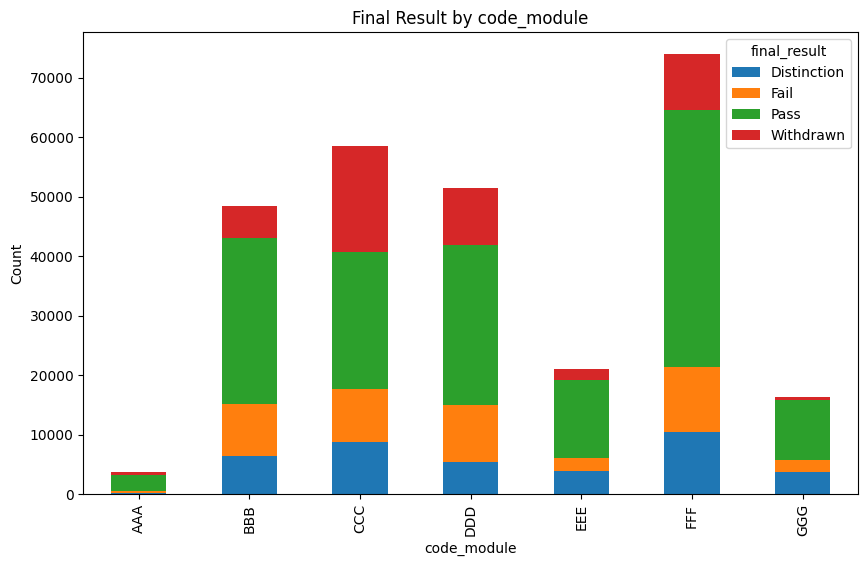

Column: start_year
Chi-square statistic: 1944.1697770684036
P-value: 0.0
Reject the null hypothesis.
There is a significant association between start_year and final result.
--------------------------------------------------


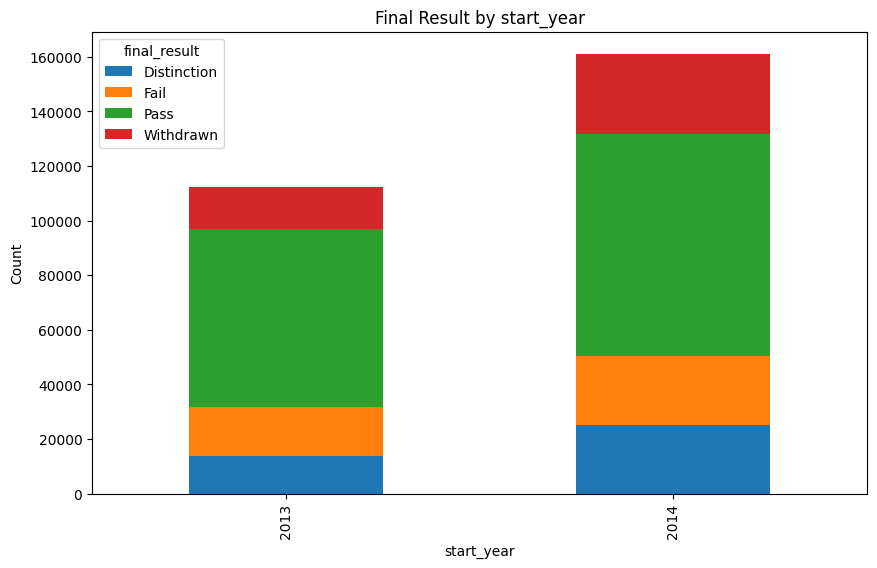

Column: start_month
Chi-square statistic: 1194.0687880428986
P-value: 1.4193031240122028e-258
Reject the null hypothesis.
There is a significant association between start_month and final result.
--------------------------------------------------


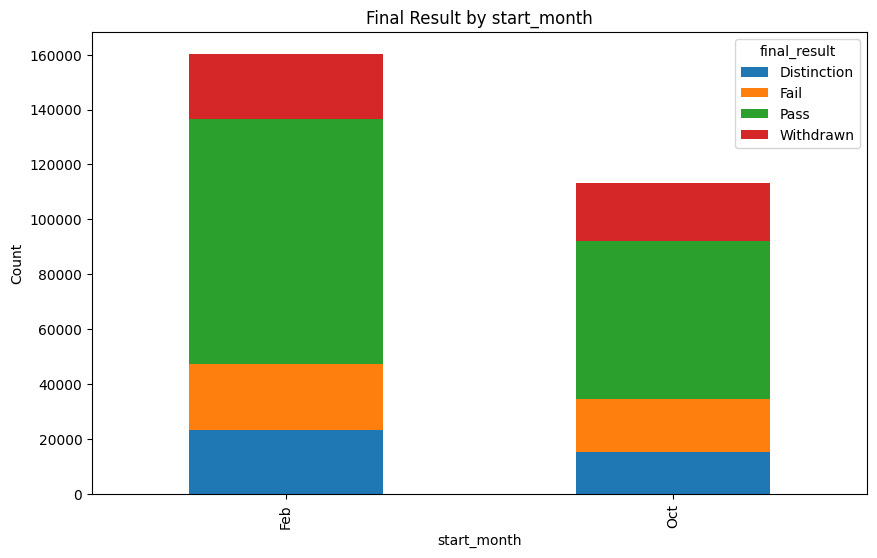

Column: gender
Chi-square statistic: 434.981608603474
P-value: 5.849440611806636e-94
Reject the null hypothesis.
There is a significant association between gender and final result.
--------------------------------------------------


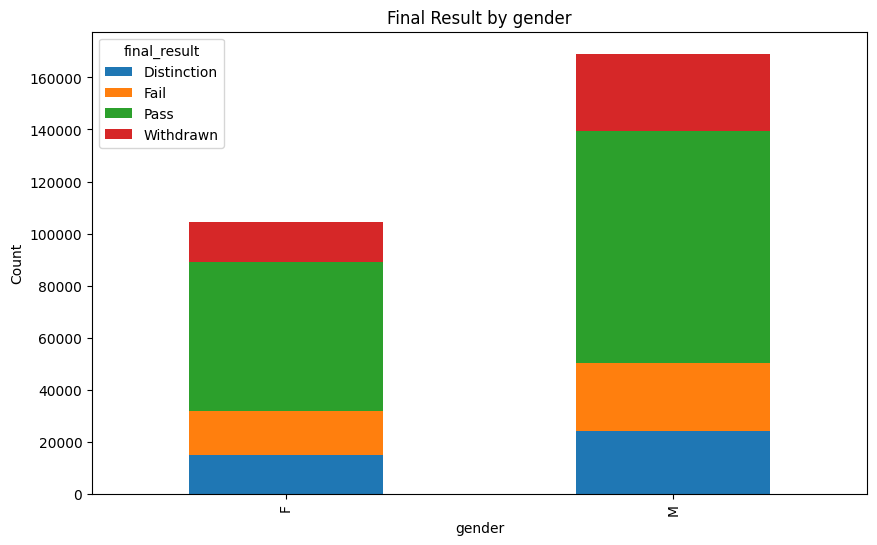

Column: region
Chi-square statistic: 2419.232418767137
P-value: 0.0
Reject the null hypothesis.
There is a significant association between region and final result.
--------------------------------------------------


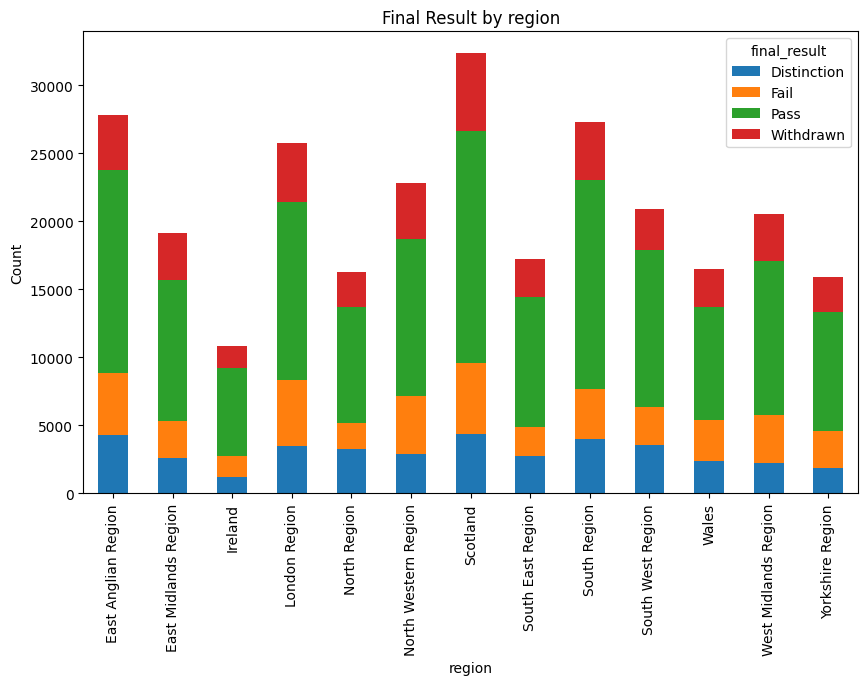

Column: highest_education
Chi-square statistic: 6540.687293474065
P-value: 0.0
Reject the null hypothesis.
There is a significant association between highest_education and final result.
--------------------------------------------------


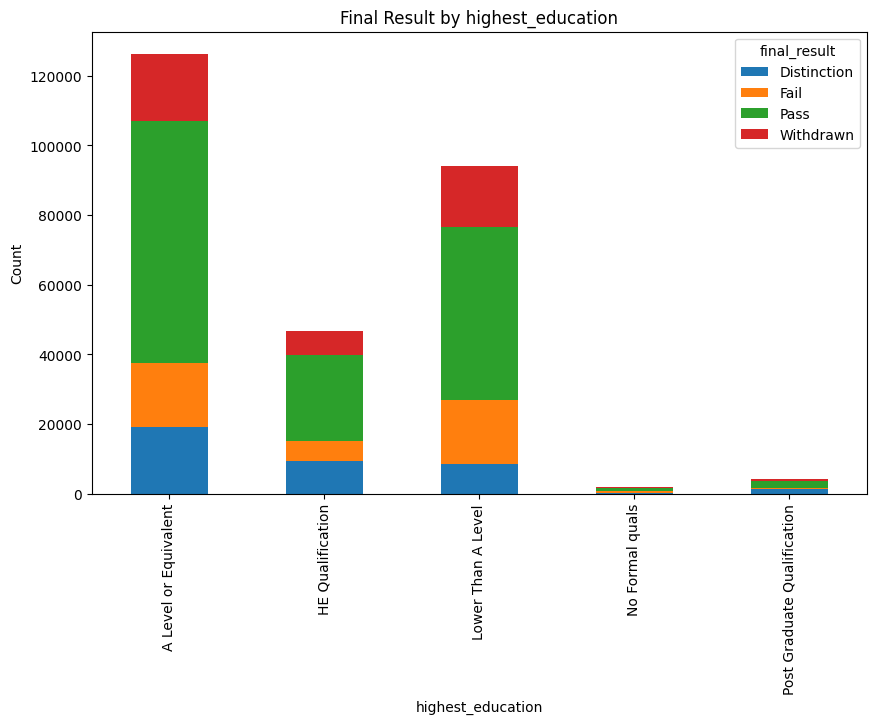

Column: imd_band
Chi-square statistic: 2783.310863492637
P-value: 0.0
Reject the null hypothesis.
There is a significant association between imd_band and final result.
--------------------------------------------------


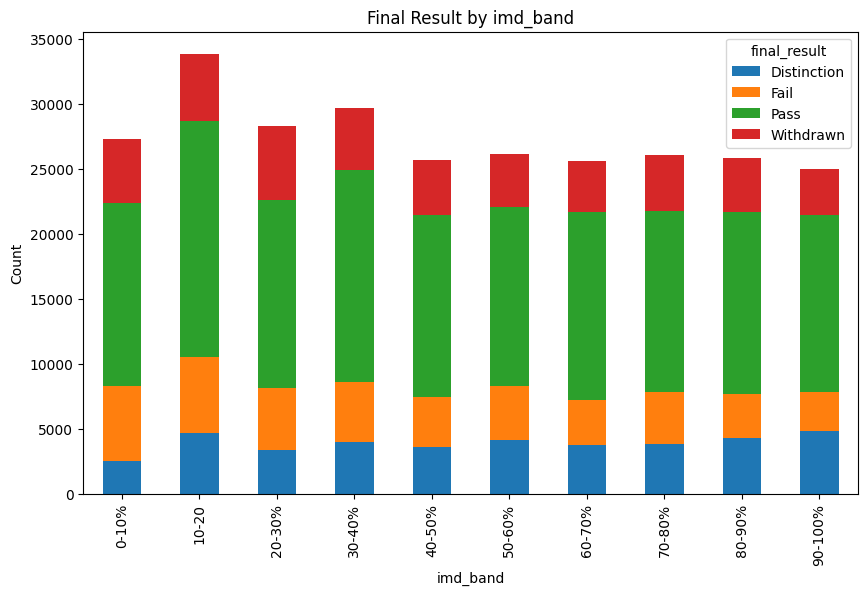

Column: age_band
Chi-square statistic: 1650.0577226479006
P-value: 0.0
Reject the null hypothesis.
There is a significant association between age_band and final result.
--------------------------------------------------


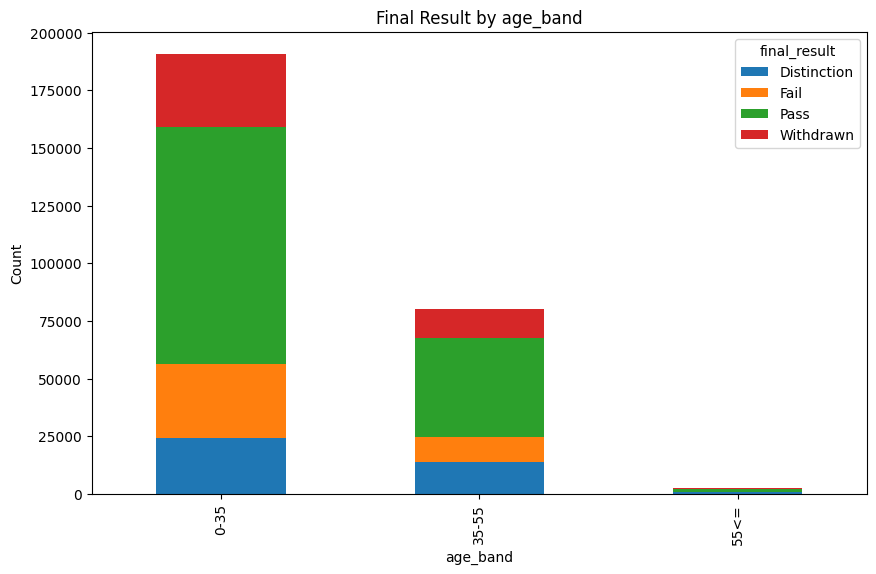

Column: num_of_prev_attempts
Chi-square statistic: 8531.90241466199
P-value: 0.0
Reject the null hypothesis.
There is a significant association between num_of_prev_attempts and final result.
--------------------------------------------------


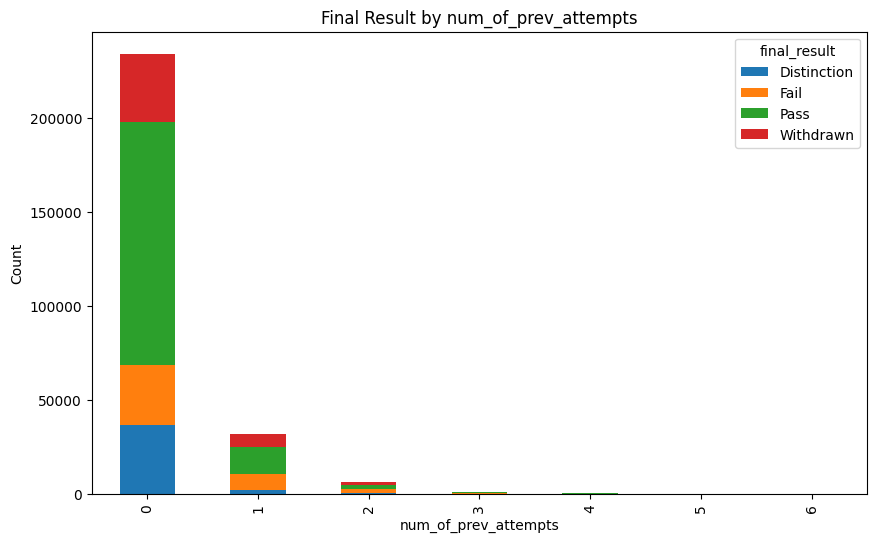

Column: disability
Chi-square statistic: 1828.137282726408
P-value: 0.0
Reject the null hypothesis.
There is a significant association between disability and final result.
--------------------------------------------------


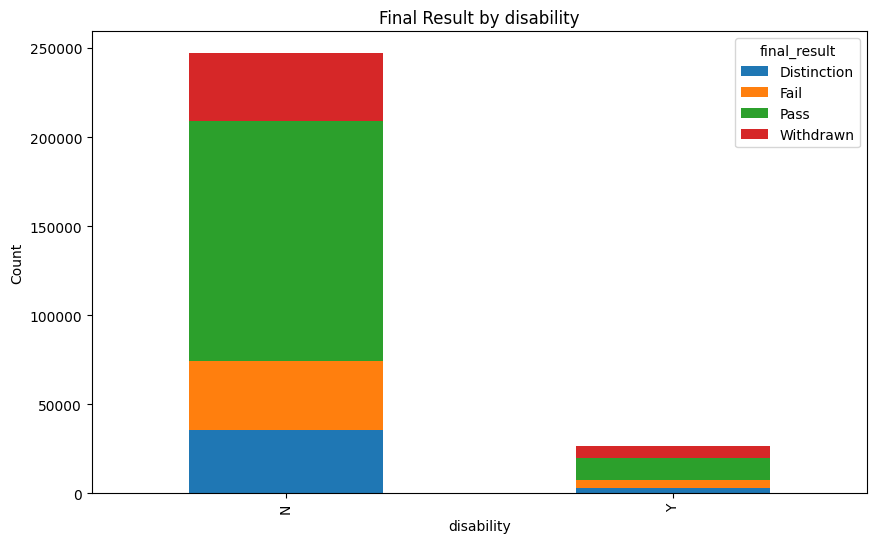

In [59]:
# List of categorical columns
categorical_columns = ['code_module','start_year', 'start_month', 'gender', 'region', 'highest_education',
                       'imd_band', 'age_band', 'num_of_prev_attempts', 'disability']

# Iterate over each column in the list
for column in categorical_columns:
    # Create the contingency table
    contingency_table = pd.crosstab(df[column], df['final_result'])
    
    # Calculate the chi-square statistic, p-value, degrees of freedom, and expected values
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print the column name
    print(f"Column: {column}")
    
    # Print the chi-square statistic and p-value
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")

    # Interpret the results based on the p-value
    alpha = 0.05
    if p < alpha:
        print("Reject the null hypothesis.")
        print("There is a significant association between", column, "and final result.")
    else:
        print("Fail to reject the null hypothesis.")
        print("There is no significant association between", column, "and final result.")
    
    # Add a separator for better readability
    print("-" * 50)

    # Plot the contingency table
    contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Final Result by {column}')
    plt.show()

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


# List of categorical columns
categorical_columns = ['code_module', 'start_year', 'start_month', 'gender', 'region', 'highest_education',
                       'imd_band', 'age_band', 'num_of_prev_attempts', 'disability']

# Encode categorical variables
le = LabelEncoder()
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

# Define the target variable
target = 'final_result'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[categorical_columns], df[target], test_size=0.2, random_state=42)

# Initialize a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = clf.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report
print(classification_report(y_test, y_pred))

Accuracy: 82.82%
              precision    recall  f1-score   support

 Distinction       0.77      0.74      0.75      7949
        Fail       0.81      0.70      0.75      8488
        Pass       0.84      0.91      0.88     29415
   Withdrawn       0.84      0.74      0.79      8844

    accuracy                           0.83     54696
   macro avg       0.82      0.78      0.79     54696
weighted avg       0.83      0.83      0.83     54696

